# Convex Optimization
## Tutorial 8
### Tanmay Garg CS20BTECH11063

In [134]:
#Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math

In [135]:
n = 100
d = 1
D1 = 0.08
D2 = 0.025
D3 = 0.005

In [136]:
h = cp.Variable(n)
e = 5 * np.sin(np.linspace(1,100,100, endpoint=True) * 3 * np.pi/100) + np.sin(np.linspace(1, 100, 100, endpoint=True) * np.pi*10 / 100)

u = h - e

In [137]:
phi_fill = 2 * cp.power(cp.pos(u),2) + 30 * cp.pos(u)
phi_cut = 12 * cp.power(cp.neg(u),2) + cp.neg(u)

MyObjective = cp.Minimize(cp.sum(phi_cut + phi_fill))

In [138]:
MyConstraints = [
    cp.abs(cp.diff(h, 1)) <= D1,
    cp.abs(cp.diff(h, 2)) <= D2,
    cp.abs(cp.diff(h, 3)) <= D3,
    h >= 0
]

In [139]:
MyProblem = cp.Problem(MyObjective, MyConstraints)
value = MyProblem.solve(solver='ECOS')
print(value)

7562.814890044061


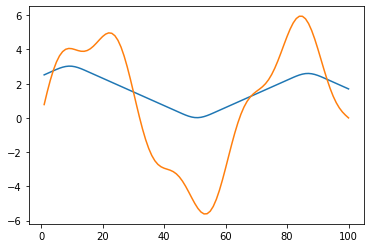

In [140]:
plt.figure()
plt.plot(np.linspace(1,100,100, endpoint=True), h.value)
plt.plot(np.linspace(1,100,100, endpoint=True), e)